<a href="https://colab.research.google.com/github/juanalvarez96/shallow2deeplab1/blob/master/lab1_mine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JUAN ÁLVAREZ FERNÁNDEZ VALLADO**

In [3]:
!pip uninstall opencv-python
!pip uninstall opencv-contrib-python
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/opencv_contrib_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-contrib-python-4.1.2.30
     |████████████████████████████████| 25.0MB 42.2MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 30.6MB 175kB/s 


In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


import numpy as np
import cv2 as cv
from google.colab import drive 

drive.mount("/content/drive/")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# Draw keypoints
img = cv.imread("/content/drive/My Drive/Colab Notebooks/Shallow to Deep Representation/LAB1/ski.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)

img = cv.drawKeypoints(gray, kp, img)
cv.imwrite('sift_keypoints.jpg', img)

True

In [3]:
# Draw descriptors
kp, des = sift.detectAndCompute(gray, None)
img = cv.drawKeypoints(gray, kp, img)
cv.imwrite('desc.jpg', img)

True

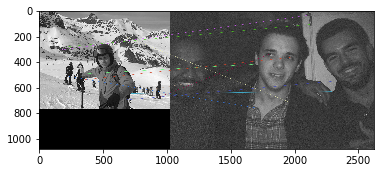

(<matplotlib.image.AxesImage at 0x7febd879e588>, None)

In [4]:
# Brute-force matching
img1 = cv.imread('/content/drive/My Drive/Colab Notebooks/Shallow to Deep Representation/LAB1/ski.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/drive/My Drive/Colab Notebooks/Shallow to Deep Representation/LAB1/copas.jpg', cv.IMREAD_GRAYSCALE)
# ORB DETECTOR
orb = cv.ORB_create()

# Retain keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Brute-force matcher object
bf = cv.BFMatcher_create(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort matches according to their distances
matches = sorted(matches, key = lambda x:x.distance)

# Draw first ones
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3), plt.show()

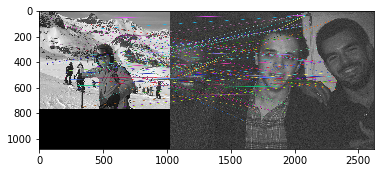

(<matplotlib.image.AxesImage at 0x7febd819f940>, None)

In [5]:
# Apply same as before but retrieving k bast matches
img1 = cv.imread('/content/drive/My Drive/Colab Notebooks/Shallow to Deep Representation/LAB1/ski.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/drive/My Drive/Colab Notebooks/Shallow to Deep Representation/LAB1/copas.jpg', cv.IMREAD_GRAYSCALE)

# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()

# Keypoints and descriptors using SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher 
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# RATIO TEST
good = []
for m,n in matches:
  if m.distance <0.75*n.distance:
    good.append([m])

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

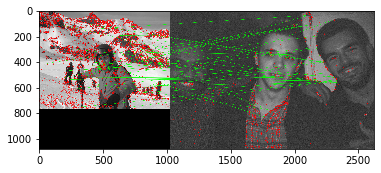

(<matplotlib.image.AxesImage at 0x7febd8281cf8>, None)

In [10]:
# FLANN based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=100) # Maybe we cna remove this
#Images
img1 = cv.imread('/content/drive/My Drive/Colab Notebooks/Shallow to Deep Representation/LAB1/ski.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/drive/My Drive/Colab Notebooks/Shallow to Deep Representation/LAB1/copas.jpg', cv.IMREAD_GRAYSCALE)
#SIFT detector
sift = cv.xfeatures2d.SIFT_create()
#Keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

In [0]:
# GEOMETRIC TRANSFORMATIONS

# SCALE
img = cv.imread('/content/drive/My Drive/Colab Notebooks/Shallow to Deep Representation/LAB1/ski.jpg')
res = cv.resize(img, None, fx = 2, fy = 2, interpolation = cv.INTER_CUBIC)

# TRANSLATION
img = cv.imread('/content/drive/My Drive/Colab Notebooks/Shallow to Deep Representation/LAB1/ski.jpg', 0)
rows, cols = img.shape

M = np.float32([[1,0,100], [0,1,50]])
dst = cv.warpAffine(img, M, (cols,rows))


**SECOND PART**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
mypath = "/content/drive/My Drive/Colab Notebooks/Shallow to Deep Representation/LAB1/gtsrb-german-traffic-sign/Train/25"

In [0]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
import math

In [0]:
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(mypath,onlyfiles[n]) )

KeyboardInterrupt: ignored

In [0]:
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = numpy.empty(len(onlyfiles), dtype=object)
len

1500

In [0]:
# Apply same as before but retrieving k bast matches
img1 = cv.imread(join(mypath,onlyfiles[2]))
img2 = cv.imread(join(mypath,onlyfiles[0]))

# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()

# Keypoints and descriptors using SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher 
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

a,b = matches[0]
print("Distance difference: "+ str(a.distance-b.distance))

Distance difference: -41.185150146484375


In [0]:
# RATIO TEST
good = []
for m,n in matches:
  if m.distance <0.95*n.distance:
    good.append([m])

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

Using the FLANN

In [0]:
# Apply same as before but retrieving k bast matches
img1 = cv.imread('/content/drive/My Drive/Colab Notebooks/Shallow to Deep Representation/LAB1/ski.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/drive/My Drive/Colab Notebooks/Shallow to Deep Representation/LAB1/copas.jpg', cv.IMREAD_GRAYSCALE)

# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()

# Keypoints and descriptors using SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher 
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# RATIO TEST
good = []
for m,n in matches:
  if m.distance <0.75*n.distance:
    good.append([m])

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

<KeyPoint 0x7f44442b9930>